# Loan Data from Prosper
## by Mert Haktanır

## Preliminary Wrangling

> Loan Dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate),
current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#### Lets load the dataset
LoanData = pd.read_csv('prosperLoanData.csv')

In [3]:
# Lets explore Loan Data
LoanData

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.00,0.00,0.00,0.00,1.0000,0,0,0.0,1


In [4]:
# There are too many variables. Lets choose them from definitions file. I changed original definitions .xlsx file type 
# into a .csv file
VarDef = pd.read_csv('Variable_Definitions.csv')
VarDef.head(4)

,Variable,Description
0,ListingKey,Unique key for each listing same value as the ...
1,ListingNumber,The number that uniquely identifies the listin...
2,ListingCreationDate,The date the listing was created.
3,CreditGrade,The Credit rating that was assigned at the tim...


I will analyze the dataset by using variables below:

1- Term,
2- LoanStatus,
3- BorrowerAPR,
4- ProsperRating (Alpha),
5- ProsperScore,
6- ListingCategory (numeric),
7- EmploymentStatusDuration,
8- IncomeRange,
9- StatedMonthlyIncome,
10- LoanOriginalAmount,

So I decided to create a new database using these 10 columns, I called it LoanDataReduced.

In [5]:
LoanDataReduced=LoanData[['Term', 'LoanStatus', 'BorrowerAPR', 'ProsperRating (Alpha)', 
                          'ProsperScore', 'ListingCategory (numeric)', 'EmploymentStatusDuration', 
                          'IncomeRange', 'StatedMonthlyIncome', 'LoanOriginalAmount']]

In [6]:
LoanDataReduced.head(5)

,Term,LoanStatus,BorrowerAPR,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount
0,36,Completed,0.16516,NaN,NaN,0,2.0,"$25,000-49,999",3083.333333,9425
1,36,Current,0.12016,A,7.0,2,44.0,"$50,000-74,999",6125.000000,10000
2,36,Completed,0.28269,NaN,NaN,0,NaN,Not displayed,2083.333333,3001
3,36,Current,0.12528,A,9.0,16,113.0,"$25,000-49,999",2875.000000,10000
4,36,Current,0.24614,D,4.0,2,44.0,"$100,000+",9583.333333,15000


In [7]:
# Lets explore shape & data types
print(LoanDataReduced.shape)
print(LoanDataReduced.dtypes)

(113937, 10)
Term                           int64
LoanStatus                    object
BorrowerAPR                  float64
ProsperRating (Alpha)         object
ProsperScore                 float64
ListingCategory (numeric)      int64
EmploymentStatusDuration     float64
IncomeRange                   object
StatedMonthlyIncome          float64
LoanOriginalAmount             int64
dtype: object


In [8]:
# descriptive statistics for numeric variables
print(LoanDataReduced.describe())

                Term    BorrowerAPR  ProsperScore  ListingCategory (numeric)  \
count  113937.000000  113912.000000  84853.000000              113937.000000   
mean       40.830248       0.218828      5.950067                   2.774209   
std        10.436212       0.080364      2.376501                   3.996797   
min        12.000000       0.006530      1.000000                   0.000000   
25%        36.000000       0.156290      4.000000                   1.000000   
50%        36.000000       0.209760      6.000000                   1.000000   
75%        36.000000       0.283810      8.000000                   3.000000   
max        60.000000       0.512290     11.000000                  20.000000   

       EmploymentStatusDuration  StatedMonthlyIncome  LoanOriginalAmount  
count             106312.000000         1.139370e+05        113937.00000  
mean                  96.071582         5.608026e+03          8337.01385  
std                   94.480605         7.478497e+03  

#### Lets further explore columns with data type as object. 
    LoanStatus can take values of:
            Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress and PastDue.
    ProsperRating (Alpha) can take values such as:
            between A, B, C, needs further investigation ...
    IncomeRange can take values such as:
            $25,000-49,999, needs further investigation ...

In [9]:
# Lets see how many different values 'LoanStatus' can take?
LoanDataReduced['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [10]:
LoanDataReduced['LoanStatus'].replace(to_replace=['Cancelled', 'FinalPaymentInProgress'], value='Completed', inplace=True)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\core\generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [12]:
LoanDataReduced['LoanStatus'].replace(to_replace=['Past Due (1-15 days)', 'Past Due (16-30 days)', 'Past Due (31-60 days)', 
                                                  'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)'], 
                                      value='Past Due', inplace=True)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\core\generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [13]:
LoanDataReduced['LoanStatus'].value_counts()

Current       56576
Completed     38284
Chargedoff    11992
Defaulted      5018
Past Due       2067
Name: LoanStatus, dtype: int64

In [9]:
# Lets see how many different values 'ProsperRating (Alpha)' can take?
LoanDataReduced['ProsperRating (Alpha)'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating (Alpha), dtype: int64

In [10]:
# Lets see how many different values 'IncomeRange' can take?
LoanDataReduced['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [11]:
LoanDataReduced['IncomeRange'].replace(to_replace=['Not displayed', 'Not employed'], value='$0', inplace=True)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\pandas\core\generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [14]:
#convert LoanStatus, ProsperRating (Alpha), and Income Range into ordered categorical types

from pandas.api.types import CategoricalDtype

ordinal_var_dict = {'LoanStatus': ['Completed', 'Current', 'Past Due', 'Defaulted', 'Chargedoff'],
                    'ProsperRating (Alpha)': ['AA', 'A', 'B', 'C', 'D', 'E', 'HR'],
                    'IncomeRange': ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0']}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21):
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                   categories = ordinal_var_dict[var])
        LoanDataReduced[var] = LoanDataReduced[var].astype(ordered_var)
    else:
        LoanDataReduced[var] = LoanDataReduced[var].astype('category', ordered = True, 
                                                          categories = ordinal_var_dict[var])

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### What is the structure of your dataset?

> There are 113,937 loans in the dataset with 10 features: 
(Term, LoanStatus, BorrowerAPR,  
ProsperRating (Alpha), ProsperScore, ListingCategory (numeric), EmploymentStatusDuration, 
IncomeRange, StatedMonthlyIncome, LoanOriginalAmount)

> Most variables are numeric in nature, other than 3 objects. 
The variables LoanStatus, ProsperRating (Alpha) & IncomeRange are ordered factor variables with the following levels.

> (best) ——> (worst) <br>
LoanStatus: Completed, Current, PastDue, Defaulted, Chargedoff <br>
ProsperRating (Alpha): AA, A, B, C, D, E, HR <br>
Income Range: 100,000+, 75,000-99,999, 50,000-74,999, 25,000-49,999, 1-24,999, 0 <br>

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out what affects the BorrowerAPR the most?  

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that ProsperScore and ProsperRating (Alpha) will have the strongest effect on the BorrowerAPR. 
Borrowers who have bad ratings should pay larger rates. Vice versa good ratings should pay smaller rates. 

> EmploymentStatusDuration, IncomeRange, StatedMonthlyIncome should also affect the rate. But in much lesser extent. Or from my limited financial knowledge I think it that way right now. We will see...

## Univariate Exploration

> Let's start by looking at the distribution of the BorrowerAPR. Because this is our main interst. 

Before going any further since BorrowerAPR is our main interest. We need to drop any rows from the database that has NA in its borrowerAPR row.

In [14]:
LoanDataReduced = LoanDataReduced.dropna(axis=0, subset=['BorrowerAPR'])

In [15]:
print(LoanDataReduced.shape[0])

113912


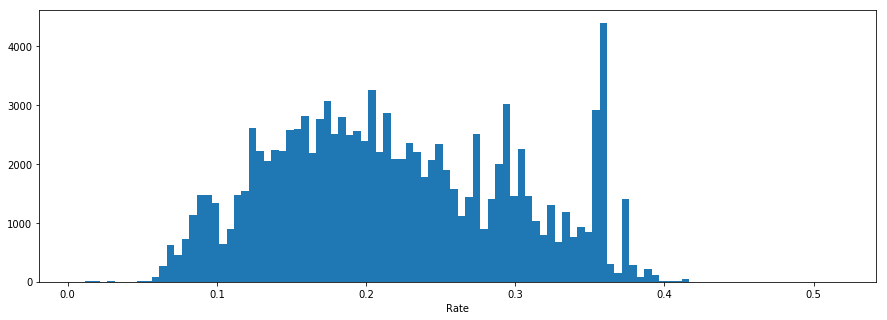

In [16]:
# OK now we have 113912 rows of data, lets see Standard-scaled plot of BorrowerAPR

binsize = 0.005
bins = np.arange(LoanDataReduced['BorrowerAPR'].min(), LoanDataReduced['BorrowerAPR'].max()+binsize, binsize)

plt.figure(figsize=[15, 5])
plt.hist(data = LoanDataReduced, x = 'BorrowerAPR', bins = bins)
plt.xlabel('Rate')
plt.show()

>BorrowerAPR Distribution takes off around a rate of 0.05 and increases up to 0.1 and then there appears a sharp decrease. After that there are usual increases and decreases and finally it touches down around 0.4. It looks like a normal distribution with a mean around 0.2. But there is a large spike at around 0.35.



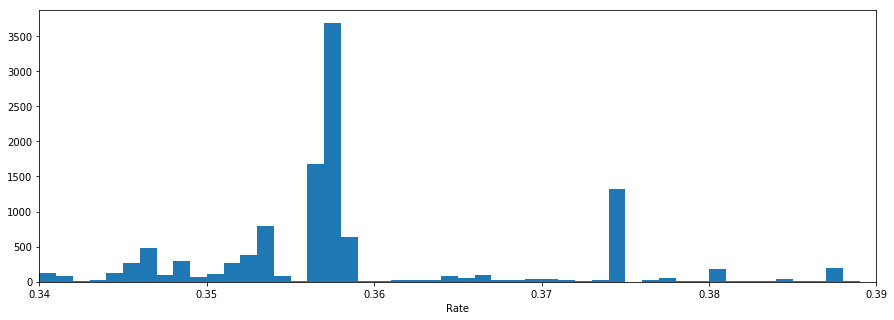

In [17]:
binsize = 0.001
bins = np.arange(0.34, 0.39, binsize)

plt.figure(figsize=[15, 5])
plt.hist(data = LoanDataReduced, x = 'BorrowerAPR', bins = bins)
plt.xlim([0.34,0.39])
plt.xlabel('Rate')
plt.show()

We really do have a big spike at around 0.357 with over 3500 times repeated; while the other rates are much lower. I wonder if this is a specific rate for people with low ratings? 

> Now lets plot EmploymentStatusDuration which is a parameter I wanted to investigate.
I have to clean NaNs from the EmploymentStatusDuration column, in order to plot histogram without errors.

In [18]:
len(LoanDataReduced) - LoanDataReduced['EmploymentStatusDuration'].count()

7600

There are 7600 NaN values in the EmploymentStatusDuration column. We need to get rid of them and replace them with zeros, so that we may plot the histogram of it. 

In [19]:
LoanDataReduced['EmploymentStatusDuration'] = LoanDataReduced['EmploymentStatusDuration'].apply(pd.to_numeric)

In [20]:
LoanDataReduced['EmploymentStatusDuration'] = LoanDataReduced['EmploymentStatusDuration'].replace(np.nan, 0)

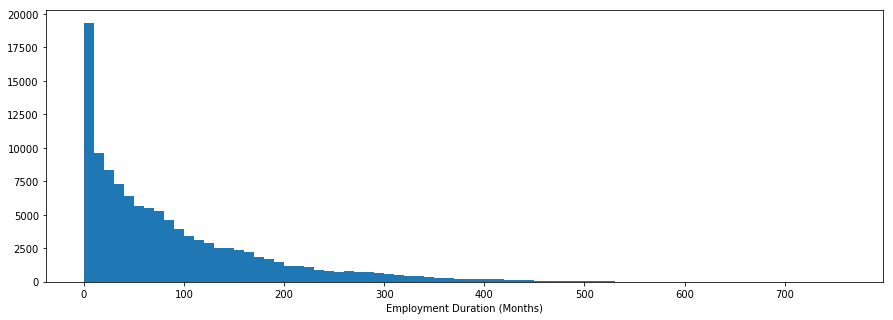

In [21]:
# Standard-scaled plot of Employment Status Duration

binsize = 10
bins = np.arange(0, LoanDataReduced['EmploymentStatusDuration'].max()+binsize, binsize)

plt.figure(figsize=[15, 5])
plt.hist(data = LoanDataReduced, x = 'EmploymentStatusDuration', bins = bins)
plt.xlabel('Employment Duration (Months)')
plt.show()

Employment Duration is very right skewed distribution. It looks like an exponential distribution other than initial 0 value, which may also be created from NaN values and also because people didn't stated it.I want to clear the 0 values because it may introduce errors later on (such as division by zero), so drop them.

In [22]:
LoanDataReduced= LoanDataReduced[LoanDataReduced['EmploymentStatusDuration'] != 0]

In [23]:
print(LoanDataReduced.shape[0])

104778


Log scale may be useful here. So lets try it. It starts from 0 months and decreases as it increases in x axis. There seems like a shoulder from 50 to 100 and 120-140.

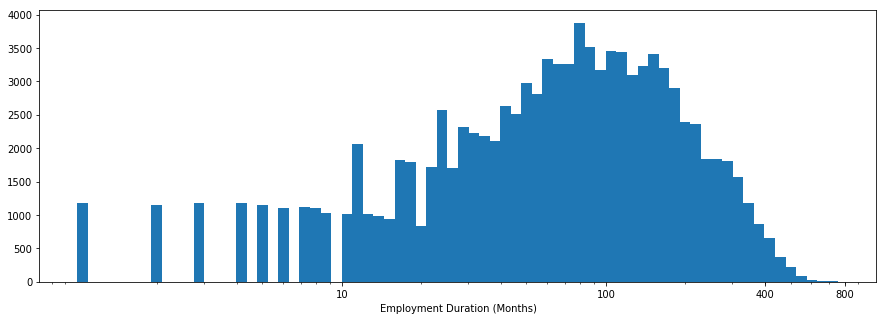

In [24]:
# there's a long tail in the distribution, so let's put it on a log scale instead

log_binsize = 0.04
bins = 10 ** np.arange(0, np.log10(LoanDataReduced['EmploymentStatusDuration'].max())+log_binsize, log_binsize)

plt.figure(figsize=[15, 5])
plt.hist(data = LoanDataReduced, x = 'EmploymentStatusDuration', bins = bins)
plt.xscale('log')
plt.xticks([1e1, 1e2, 4e2, 8e2], ['10', '100', '400', '800'])
plt.xlabel('Employment Duration (Months)')
plt.show()

From the graph you may observe that small values (less than 10 months) are splitted up. Rest is an unimodal distrubiton with its center around 90 months. So borrowers are generally young people with an job experience of 7 years or less...

These loans might be used to home ownership, weddings and such... We will investigate them later. 

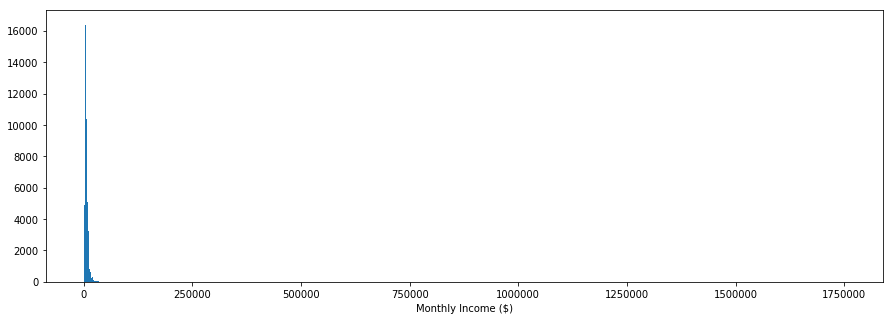

In [25]:
# Standard-scaled plot of StatedMonthlyIncome

binsize = 1000
bins = np.arange(LoanDataReduced['StatedMonthlyIncome'].min(), LoanDataReduced['StatedMonthlyIncome'].max()+binsize, binsize)

plt.figure(figsize=[15, 5])
plt.hist(data = LoanDataReduced, x = 'StatedMonthlyIncome', bins = bins)
plt.xlabel('Monthly Income ($)')
plt.show()

Most of the data is set to the far left, this suggests strong outliers on the right. 
It's worth taking a bit of time to identify these outliers and see if they need to be filtered out of the data.
It looks like there are some very rich people who borrowed money from the bank that have monthly income above a million dollars!

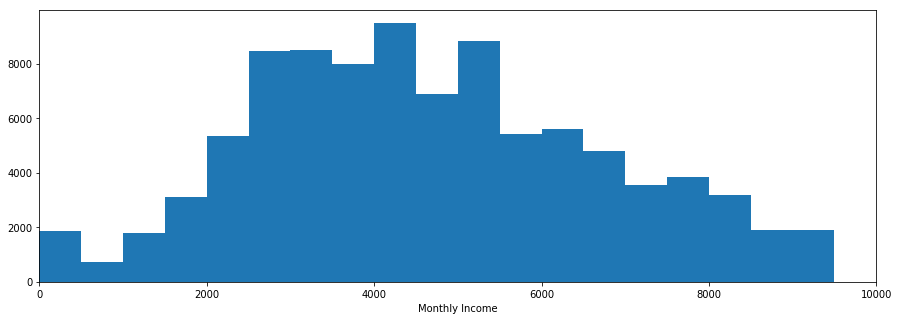

In [26]:
# Need to zoom further into 0-10000 range and disregard super rich people.

binsize = 500
bins = np.arange(0, 10000, 500)

plt.figure(figsize=[15, 5])
plt.hist(data = LoanDataReduced, x = 'StatedMonthlyIncome', bins = bins)
plt.xlim([0,10000])
plt.xlabel('Monthly Income')
plt.show()

From this zoomed in graph we may observe that monthly income has a gaussian distribution with a mean 4000 and 6000. Which make sense when we think about whole population. 

In [27]:
# How many people have monthly income above 10,000 out of this 113,912 people
over_10K_income = sum(LoanDataReduced['StatedMonthlyIncome']>10000)
over_10K_income

9267

In [28]:
percent_above_10K_income = over_10K_income/LoanDataReduced.shape[0]*100
percent_above_10K_income

8.8444139036820708

In [29]:
over_100K_income = sum(LoanDataReduced['StatedMonthlyIncome']>100000)
over_100K_income

14

In [30]:
percent_above_100K_income = over_100K_income/LoanDataReduced.shape[0]*100
percent_above_100K_income

0.013361583538529079

In [31]:
# select low outliers, using criteria eyeballed from the plots

high_outliers = (LoanDataReduced['StatedMonthlyIncome']>100000)

print(LoanDataReduced.loc[high_outliers,['StatedMonthlyIncome']])

        StatedMonthlyIncome
8066           4.166667e+05
17411          4.833333e+05
35218          1.083333e+05
45028          1.500000e+05
53014          6.185478e+05
53167          1.750003e+06
56867          1.850818e+05
57133          4.666667e+05
59298          1.208333e+05
78431          1.033341e+05
80075          1.583333e+05
82831          2.500000e+05
111265         1.087500e+05
113270         3.944000e+05


This is very illuminating. From the original figure where we coded LoanDataReduced['StatedMonthlyIncome'].max()+binsize

In the plot x-axis strecht to 1,750 K which means 1,75 e+06. And super rich people data is all e+05s but there it is in row 53167 with an monthly income of 1.75 e+06. 

Only 1 guy and it really distorts our graph. This may be a typo but there are certainly billioners all over the world so it might be true. 

In [32]:
super_rich = LoanDataReduced['StatedMonthlyIncome']>1000000
LoanDataReduced[super_rich]

,Term,BorrowerAPR,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount
53167,36,0.35797,HR,4.0,3,114.0,"$100,000+",1.750003e+06,4000


OK. This is also very illuminating. Because this guy has the worst rating. He took 4K from the bank but he already has 1750K income. This does not make any sense, so I drop this row. It must be a mistake. 

In [33]:
# Removing the outlier (errornous entry) and testing it.

LoanDataReduced.drop(53167, inplace=True)
LoanDataReduced['StatedMonthlyIncome'].max()

618547.83333299996

In [34]:
very_rich = LoanDataReduced['StatedMonthlyIncome']>100000
LoanDataReduced[very_rich]

,Term,BorrowerAPR,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount
8066,36,0.35643,HR,4.0,1,183.0,"$100,000+",416666.666667,2000
17411,36,0.35643,E,5.0,1,121.0,"$100,000+",483333.333333,7500
35218,36,0.07389,AA,10.0,3,233.0,"$100,000+",108333.333333,1000
45028,36,0.33973,E,2.0,1,97.0,"$100,000+",150000.000000,4000
53014,12,0.25785,D,3.0,3,117.0,"$100,000+",618547.833333,4000
56867,36,0.11144,NaN,NaN,0,8.0,"$100,000+",185081.750000,25000
57133,36,0.35643,E,5.0,2,271.0,"$100,000+",466666.666667,4000
59298,36,0.24246,C,6.0,20,91.0,"$100,000+",120833.333333,15000
78431,36,0.20253,NaN,NaN,0,10.0,"$100,000+",103334.083333,5000
80075,36,0.20217,C,6.0,1,58.0,"$100,000+",158333.333333,25000


Some of the entries are suspicious: 
ProsperRating (Alpha) = HR  (8066)
ProsperRating (Alpha) = NaN (56867, 78431)

In [35]:
LoanDataReduced.drop([8066, 56867, 78431], inplace=True)

In [36]:
len(LoanDataReduced) - LoanDataReduced['ProsperScore'].count()

21038

In [37]:
LoanDataReduced = LoanDataReduced.dropna(axis=0, subset=['ProsperScore'])

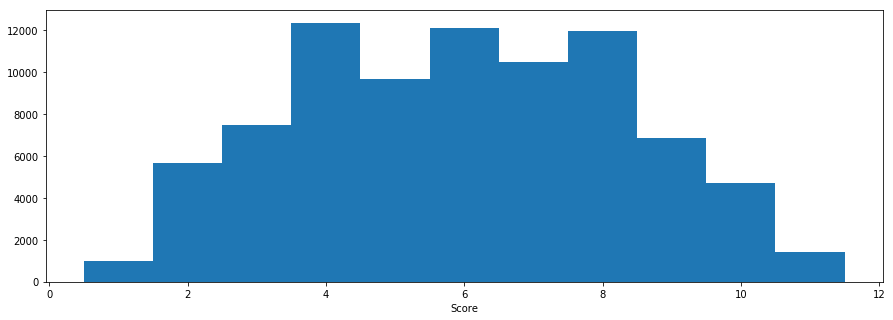

In [38]:
binsize = 1
bins = np.arange(0, 12, 1)

plt.figure(figsize=[15, 5])
plt.hist(data = LoanDataReduced, x = 'ProsperScore', bins = bins+0.5)
plt.xlabel('Score')
plt.show()

ProsperScore variable has a nice Gaussian Distribution. 4 and 8 slightly more than 5 and 7 though.  

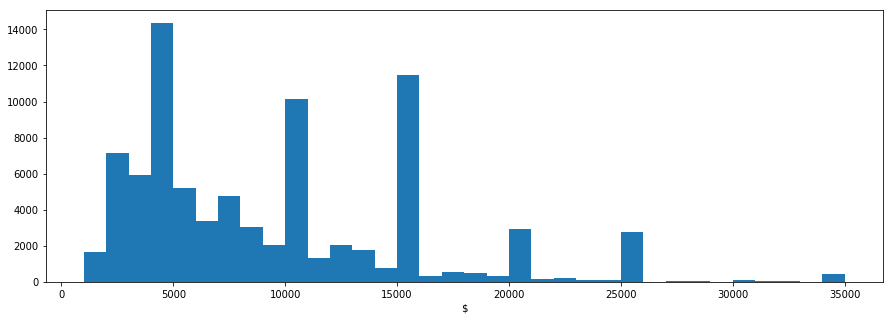

In [39]:
# Standard-scaled plot of LoanOriginalAmount

binsize = 1000
bins = np.arange(LoanDataReduced['LoanOriginalAmount'].min(), LoanDataReduced['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[15, 5])
plt.hist(data = LoanDataReduced, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('$')
plt.show()

From the histogram one may observe that 5K, 10K, 15K, etc... has more frequented. Because people and bankers generally love to work with round figures. 

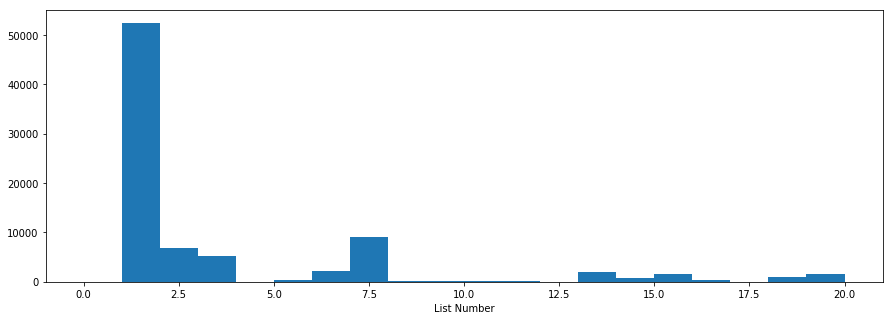

In [40]:
# Standard-scaled plot of ListingCategory (numeric)

binsize = 1
bins = np.arange(LoanDataReduced['ListingCategory (numeric)'].min(), LoanDataReduced['ListingCategory (numeric)'].max()+binsize, binsize)

plt.figure(figsize=[15, 5])
plt.hist(data = LoanDataReduced, x = 'ListingCategory (numeric)', bins = bins)
plt.xlabel('List Number')
plt.show()

Wow thats a lot of Category Number 1: Debt Consolidation, and Second is 7: Other. Thats very suprising to me.

In [41]:
LoanDataReduced['ListingCategory (numeric)'].value_counts()

1     52413
7      9102
2      6749
3      5239
6      2215
13     1954
15     1501
18      879
14      865
20      767
19      761
16      302
5       268
11      217
8       199
10       91
9        85
12       58
17       51
0        20
Name: ListingCategory (numeric), dtype: int64

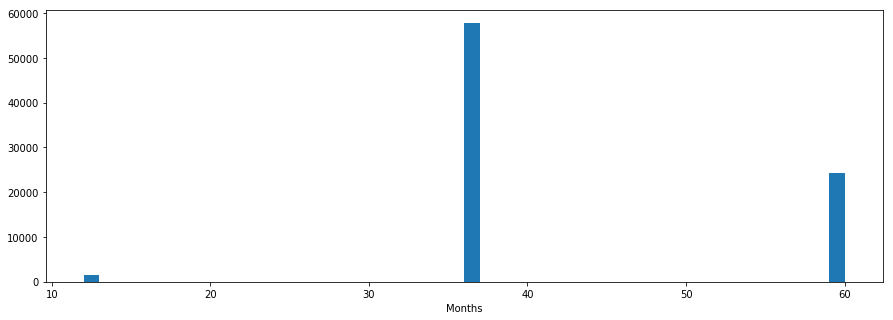

In [42]:
# Standard-scaled plot of Term

binsize = 1
bins = np.arange(LoanDataReduced['Term'].min(), LoanDataReduced['Term'].max()+binsize, binsize)

plt.figure(figsize=[15, 5])
plt.hist(data = LoanDataReduced, x = 'Term', bins = bins)
plt.xlabel('Months')
plt.show()

Wow thats also very suprising. Loans are mostly for 3 year period. Some are 5 and very little amount of 1 year loans. Now this makes sense much more because I don't expect home mortgages here. Or other large amount loans can not be expected here.   

In [43]:
print(LoanDataReduced.shape[0])

83736


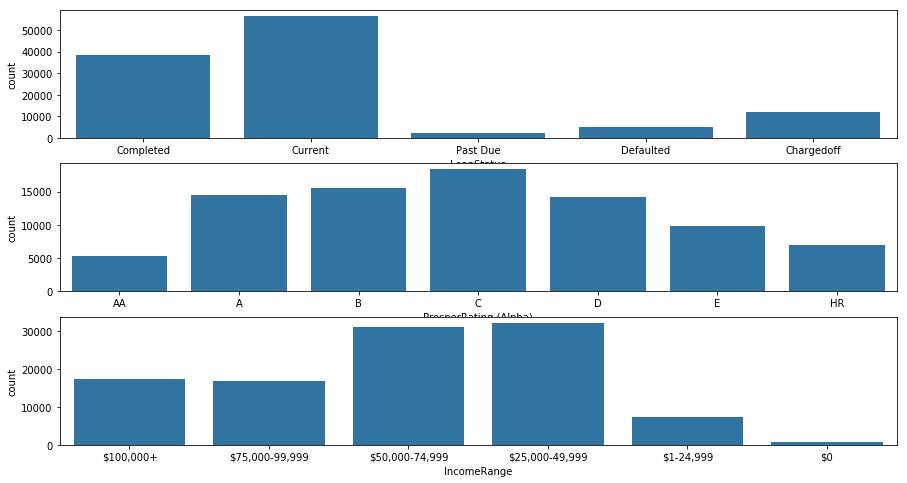

In [15]:
# I cliamed that (with my very limited knowledge of finance) ProsperRating (Alpha) might be very important on rate. 
# But lets see three together to get an idea of each ordinal variable's distribution.

fig, ax = plt.subplots(nrows=3, figsize = [15,8])

default_color = sb.color_palette()[0]
sb.countplot(data = LoanDataReduced, x = 'LoanStatus', color = default_color, ax = ax[0])
sb.countplot(data = LoanDataReduced, x = 'ProsperRating (Alpha)', color = default_color, ax = ax[1])
sb.countplot(data = LoanDataReduced, x = 'IncomeRange', color = default_color, ax = ax[2])

plt.show()

Loan Status showed that our dataset consists of mainly Current & Completed Loans. Bad Loans are much less. Though there is a significant amount of Chargedoff loans, followed by defaulted and past due loans. 

If we look at the Rating (Alpha) distribution we may see that it is very much like a bell shaped curve. Funnyly it really looks like a midterm grades coming from a university class, where grades are mostly C's and some A+ (AA in our case) and some F's (HR in our case).

When we investigate the income level chart we see that income level is mostly between 25K to 75K. Poor people (less than 25K) are less in our dataset.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> BorrowerAPR did not draw the histogram at the first try. This is because there are NaNs in the original dataframe. Therefore I dropped the NaNs first. 25 rows dropped and 113,912 remained. Distribution graph looks like a Gaussian Distribution with a large spike around 0.35. Closer look revealed it is around 0.357 with 3500 times repeated. 


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> EmploymentStatusDuration had 7600 NaNs in it. And also some zeros. I removed all of them. It is very right skewed dist, almost a classical example of an exponential distribution. If you plot the log chart you see small values are splitted up and otherwise unimodal distrubiton with its center around 90 months. This means loaners are generally young people with around 7 years of job experience. This also may mean that they are for home ownership, wedding expenditures etc.. 

> If you get the histogram of StatedMonthlyIncome and use min and max values to draw. There has been so much emptiness in the plot. Because some people stated that they have income level above a million dollars per month. Further look reveals that 17% has income over 10K per month, and only 17 people has stated an income level over 100K per month. There is a person with a 1750 K monthly income! which is ridicoulus. But if you look at the row, he has a HR rating and got only 4K from the bank. It think this is a mistake so I removed it. I also removed potentially wrong super rich people entries which are outliers for my data.

> ProsperScore: I have dropped rows without ProsperScore, since it is very important for the rate. After that it has a nice Gaussian Dsitribution. 

> Listing Category (numeric): Well no changes at this stage. But a lot of loans are taken for Debt Consilidation, which is very suprsing to me. I have always though it would be for home buying or wedding expenses. 

> Term: Variable expalined a lot. Because now I know that these are short term loans. Mostly 3 year long ones. 

> Rating Alpha looked fine. for Income Level I put Not displayed and Not employed values into 0 dollars income. 

> Overall: I started with 113,937 and continoued with 83,736 rows.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [16]:
numeric_vars = ['BorrowerAPR', 'EmploymentStatusDuration', 'StatedMonthlyIncome', 
                'Term', 'ProsperScore', 'ListingCategory (numeric)', 'LoanOriginalAmount']
categoric_vars = ['LoanStatus', 'ProsperRating (Alpha)', 'IncomeRange']

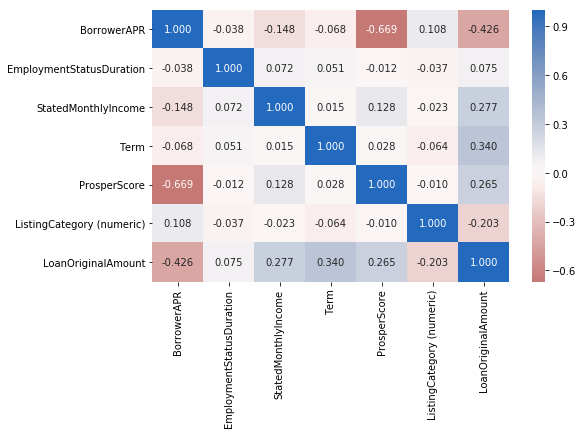

In [46]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(LoanDataReduced[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

# plot matrix: sample 500 loans

samples = np.random.choice(LoanDataReduced.shape[0], 500, replace = False)
LoanDataReduced_samp = LoanDataReduced.loc[samples,:]

g = sb.PairGrid(data = LoanDataReduced_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

The highest correlation between BorrowerAPR and rest of the numeric variables is ProsperScore which is negative 0.67. This is understandable since better Score should give you lower rates. But I expected it much more close to 1. LoanOriginalAmout comes second with only 0.426. 3rd is StatedMonthlyIncome with a very loose 0.148. 

EmploymentStatusDuration is not correlated with any of the variables. 

StatedMonthlyIncome slightly correlated with LoanOriginalAmount. 

Term slightly correlated with LoanOriginalAmount. 

ProsperScore is correlated with BorrowerAPR and secondly and slightly with LoanOriginalAmount. 

ListingCategory (numeric) slightly correlated with LoanOriginalAmount.

Strangely, and news to me that LoanOriginalAmount is more in correlation with other variables. 


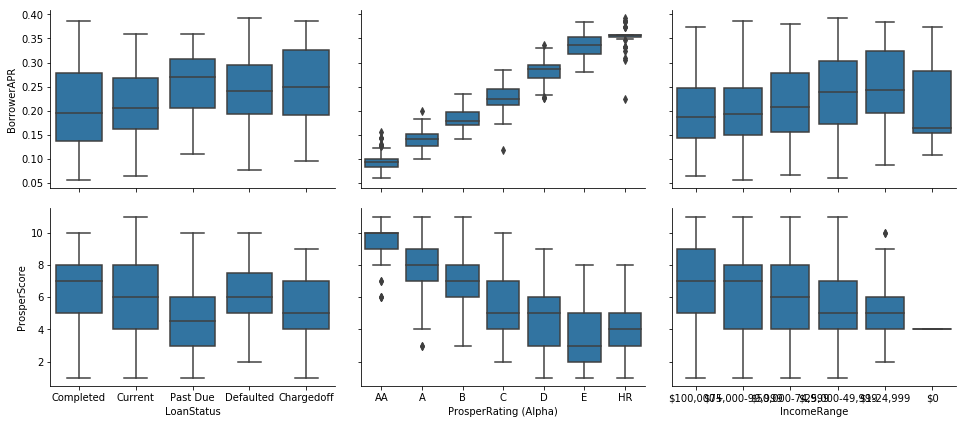

In [17]:
# plot matrix of numeric features against categorical features.

samples = np.random.choice(LoanDataReduced.shape[0], 2000, replace = False)
LoanDataReduced_samp = LoanDataReduced.loc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = LoanDataReduced_samp, y_vars = ['BorrowerAPR', 'ProsperScore'], x_vars = categoric_vars,
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

LoanStatus vs BorrowerAPR reveals that mean values of bad statuses are on the high side comparing to the mean values of the good statuses. 

LoanStatus vs ProsperScore has some interesting features because defaulted and current columns have same mean scores. IQs of the Past Due is lower comparing to others. This may be because of the fact that people with the low scores tend to miss the due dates of their loans. 

ProsperRating (Alpha) vs BorrowerAPR shows a clear step up box plot. As you improve in your rating score your interest rate systematically drops. Though you may see some people with AA ratings have higher rates than A ratings. This phenomenon also can be observed in every next rating. WE also can see outliers at B rating with very high interest rate. And Conversly at D with very low rates. HR rating is strange it is mostly have 0.35 highest rating. And Outliers span from 0.40 to all the way down to 0.20.

IncomeRange vs BorrowerAPR is a strange plot. When we observe means it is clear that if you have less income your interest rate increases which is reasonable because as you have less income you may shy away from paying your interest and instead pay for your basic needs. But when you look at the IQs you see that whether you have low or high income you may get lower rates. This means that it is more important that you pay on time. Strange thing is that people who declared 0 dollars of income also got good rates. Though minimum got 0.15. I think these people may be housewifes, or students.

ProsperRating (Alpha) vs ProsperScore supposed to be very related and it is in the boxplot. Mean values constantly decrease as you move from left to right. Strangely from min and max values you see that people with D ratings may have 10 as score. Also AA rating have outliers down to score 4. Which is also very intersting. 

IncomeRange vs ProsperScore plot is very illuminating. 100K income has a wider distribution than 75K, even though they both have same mean, min, max and IQ3 only IQ1 is different. With 100K is more in score. Similarly 75K and 50K has everything same except mean with mean score is worse for 50K. To sum up all Income Ranges have wide distributions for ProsperScores.

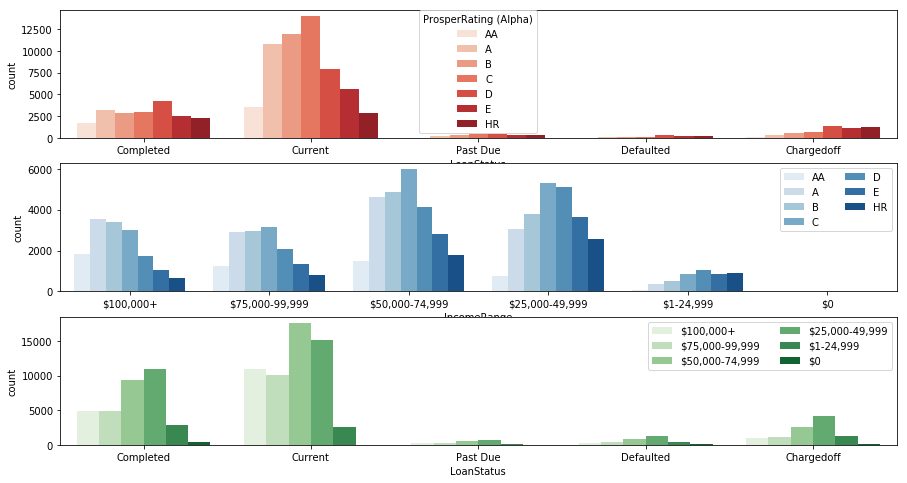

In [21]:
plt.figure(figsize = [15, 8])

# LoanStatus vs. ProsperRating (Alpha)
plt.subplot(3, 1, 1)
sb.countplot(data = LoanDataReduced, x = 'LoanStatus', hue = 'ProsperRating (Alpha)', palette = 'Reds')

# IncomeRange vs. ProsperRating (Alpha)
ax = plt.subplot(3, 1, 2)
sb.countplot(data = LoanDataReduced, x = 'IncomeRange', hue = 'ProsperRating (Alpha)', palette = 'Blues')
ax.legend(ncol = 2)

# LoanStatus vs. IncomeRange
ax = plt.subplot(3, 1, 3)
sb.countplot(data = LoanDataReduced, x = 'LoanStatus', hue = 'IncomeRange', palette = 'Greens')
ax.legend(loc = 1, ncol = 2)

plt.show()

LoanStatus vs. ProsperRating (Alpha) does not tell much. Only thing intersting is there are some AA and A ratings on bad statuses. 

IncomeRange vs. ProsperRating (Alpha) AA ratings are in every income level though percentage decreases with decreasing income level. Similarly HR percentage increases with decreasing income level. 

LoanStatus vs. IncomeRange reveals that bad credits are generally with 25K-49K range; however good ones more on the 50K-75K range. 

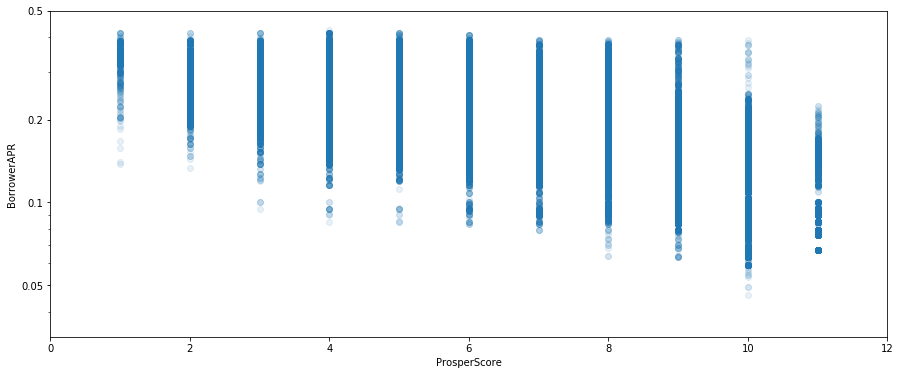

In [23]:
# scatter plot of BorrowerAPR vs. ProsperScore, with log transform on BorrowerAPR axis

plt.figure(figsize = [15, 6])
plt.scatter(data = LoanDataReduced, x = 'ProsperScore', y = 'BorrowerAPR', alpha = 1/10)
plt.xlim([0, 12])
plt.xlabel('ProsperScore')
plt.yscale('log')
plt.yticks([0.05, 0.1, 0.2, 0.5], [0.05, 0.1, 0.2, 0.5])
plt.ylabel('BorrowerAPR')
plt.show()

This plot clearly suggests that as you increase your ProsperScore you will get better interest rates. Let's now investigate the relation between LoanOriginalAmount and APR; our second related variable in a similar graph. 

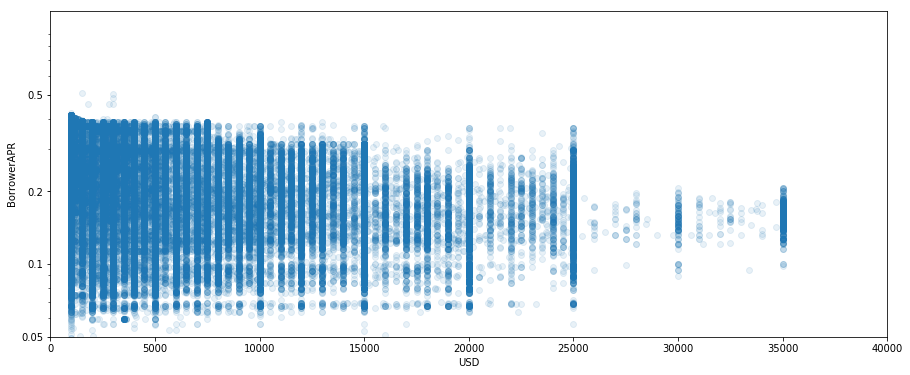

In [30]:
plt.figure(figsize = [15, 6])
plt.scatter(data = LoanDataReduced, x = 'LoanOriginalAmount', y = 'BorrowerAPR', alpha = 1/10)
plt.xlim([0, 40000])
plt.xlabel('USD')
plt.yscale('log')
plt.yticks([0.05, 0.1, 0.2, 0.5], [0.05, 0.1, 0.2, 0.5])
plt.ylabel('BorrowerAPR')
plt.show()

In [ ]:
Comments...

In [31]:
def cuberoot_trans(x, inverse = False):
    """ quick function for computing cube root and cube operations """
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


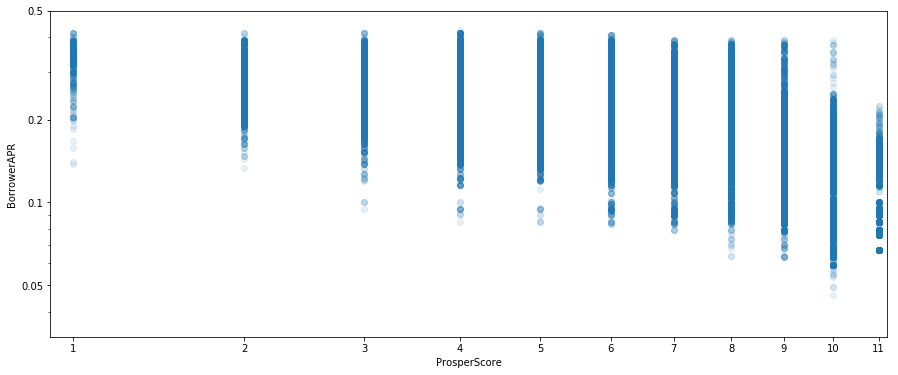

In [39]:
# scatter plot of BorrowerAPR vs. ProsperScore, with log transform on BorrowerAPR axis and
# cube-root transform on ProsperScore
LoanDataReduced['cr_ProsperScore'] = LoanDataReduced['ProsperScore'].apply(cuberoot_trans)

plt.figure(figsize = [15, 6])
plt.scatter(data = LoanDataReduced, x = 'cr_ProsperScore', y = 'BorrowerAPR', alpha = 1/10)

ProsperScore_ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
plt.xticks(cuberoot_trans(np.array(ProsperScore_ticks)), ProsperScore_ticks)
plt.xlim([cuberoot_trans(.9), cuberoot_trans(11.2)])
plt.xlabel('ProsperScore')

plt.yscale('log')
plt.yticks([0.05, 0.1, 0.2, 0.5], [0.05, 0.1, 0.2, 0.5])
plt.ylabel('BorrowerAPR')

plt.show()

Now thanks to the cube-root transform realtionship with BorrowerAPR and ProsperScore is more clear. If you have a bad score you will pay more interest and if you have a good one you will pay less!

In [40]:
# compute the logarithm of BorrowerAPR

def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

LoanDataReduced['log_BorrowerAPR'] = LoanDataReduced['BorrowerAPR'].apply(log_trans)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


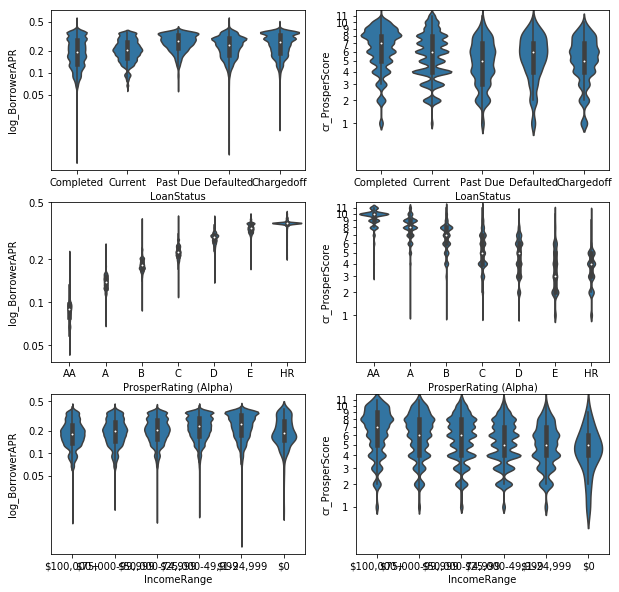

In [42]:
# plot the categorical variables against BorrowerAPR and ProsperScore again

fig, ax = plt.subplots(ncols = 2, nrows = 3 , figsize = [10,10])

for i in range(len(categoric_vars)):
    var = categoric_vars[i]
    sb.violinplot(data = LoanDataReduced, x = var, y = 'log_BorrowerAPR', ax = ax[i,0],
               color = default_color)
    ax[i,0].set_yticks(log_trans(np.array([0.05, 0.1, 0.2, 0.5])))
    ax[i,0].set_yticklabels([0.05, 0.1, 0.2, 0.5])
    sb.violinplot(data = LoanDataReduced, x = var, y = 'cr_ProsperScore', ax = ax[i,1],
               color = default_color)
    ax[i,1].set_yticks(cuberoot_trans(np.array(ProsperScore_ticks)))
    ax[i,1].set_yticklabels(ProsperScore_ticks)
    ax[i,1].set_ylim(cuberoot_trans(np.array([0.1, 12])))

plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!